In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [381]:
train = pd.read_csv('train.csv')
predict = pd.read_csv('test.csv')

In [382]:
train_original = train.copy()
predict_original = predict.copy()

In [383]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [384]:
predict.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [385]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [386]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [387]:
print(train.isnull().values.sum())

149


In [388]:
train['Gender'].describe()

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

In [389]:
train['Gender'] = train['Gender'].fillna('Male')

In [390]:
train['Married'].describe()

count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object

In [391]:
train['Married'] = train['Married'].fillna('Yes')

In [392]:
train['Dependents'].describe()

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

In [393]:
train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [394]:
train['Dependents'] = train['Dependents'].fillna('0')

In [395]:
train['Self_Employed'].describe()

count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object

In [396]:
train['Self_Employed'] = train['Self_Employed'].fillna('No')

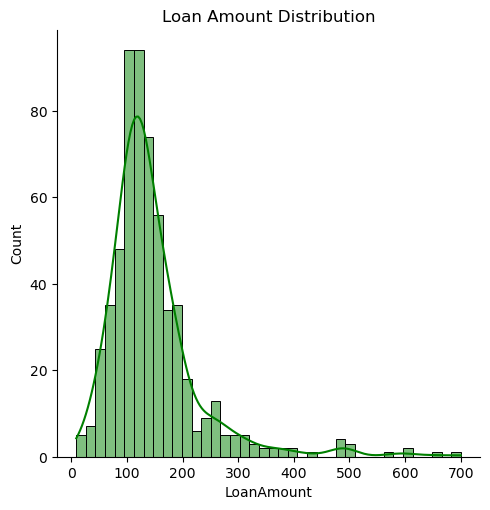

In [397]:
sns.displot(train['LoanAmount'], bins=40, kde=True, color='g')
plt.title("Loan Amount Distribution")
plt.show()

In [398]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())

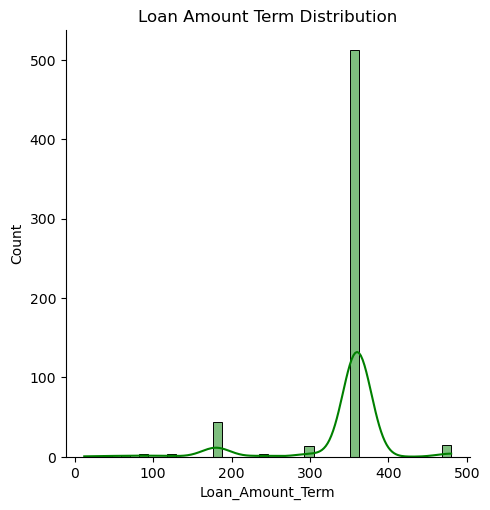

In [399]:
sns.displot(train['Loan_Amount_Term'], bins=40, kde=True, color='g')
plt.title("Loan Amount Term Distribution")
plt.show()

In [400]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median())

In [401]:
train['Credit_History'].unique()

array([ 1.,  0., nan])

In [402]:
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])

In [403]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [404]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
imputer = KNNImputer(n_neighbors=5)

In [405]:
cat_cols = ['Gender','Married','Dependents','Self_Employed','Credit_History']
num_cols = ['LoanAmount','Loan_Amount_Term']
#类别列
encoder = OrdinalEncoder()
train_enc = train.copy()
train_enc[cat_cols] = encoder.fit_transform(train_enc[cat_cols])
filled_cat = imputer.fit_transform(train_enc[cat_cols])
filled_cat = pd.DataFrame(filled_cat, columns=cat_cols, index=train.index)
for i, c in enumerate(cat_cols):
    max_code = len(encoder.categories_[i]) - 1
    filled_cat[c] = np.rint(filled_cat[c]).clip(0, max_code).astype(int)
filled_cat = pd.DataFrame(encoder.inverse_transform(filled_cat[cat_cols]),columns=cat_cols,index=train.index)
#数值列
filled_num = imputer.fit_transform(train[num_cols])
filled_num = pd.DataFrame(filled_num, columns=num_cols, index=train.index)
train_filled = train.copy()
train_filled[cat_cols] = filled_cat
train_filled[num_cols] = filled_num

In [406]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [407]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

<Axes: title={'center': 'Loan Status'}, xlabel='Loan_Status'>

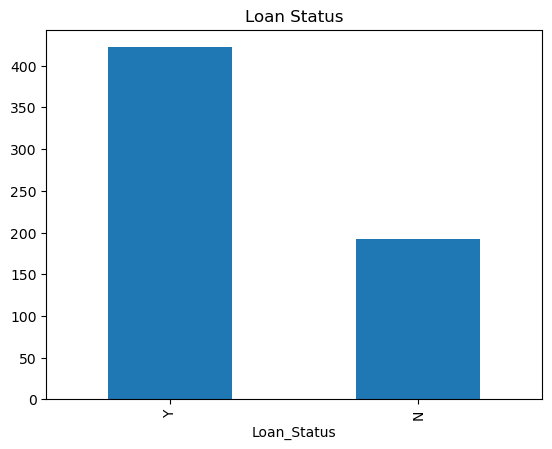

In [408]:
train['Loan_Status'].value_counts().plot.bar(title='Loan Status')

In [409]:
#处理imbalanced data
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder
from collections import Counter

X = train.drop(['Loan_ID','Loan_Status'], axis=1)  
y = train['Loan_Status'].map({'Y':1, 'N':0})      
cat_cols = X.select_dtypes(include=['object']).columns
if len(cat_cols) > 0:
    encoder = OrdinalEncoder()
    X[cat_cols] = encoder.fit_transform(X[cat_cols])
print('original distribution', Counter(y))
smote = SMOTE(random_state=42, sampling_strategy='auto')  
X_res, y_res = smote.fit_resample(X, y)
print("after smote distribution:", Counter(y_res))
train_resampled = pd.concat([pd.DataFrame(X_res, columns=X.columns),pd.Series(y_res, name='Loan_Status')], axis=1)
train_resampled['Loan_Status'] = train_resampled['Loan_Status'].map({1:'Y', 0:'N'})
print(train_resampled['Loan_Status'].value_counts())

original distribution Counter({1: 422, 0: 192})
after smote distribution: Counter({1: 422, 0: 422})
Loan_Status
Y    422
N    422
Name: count, dtype: int64


<Axes: title={'center': 'Credit History'}, xlabel='Credit_History'>

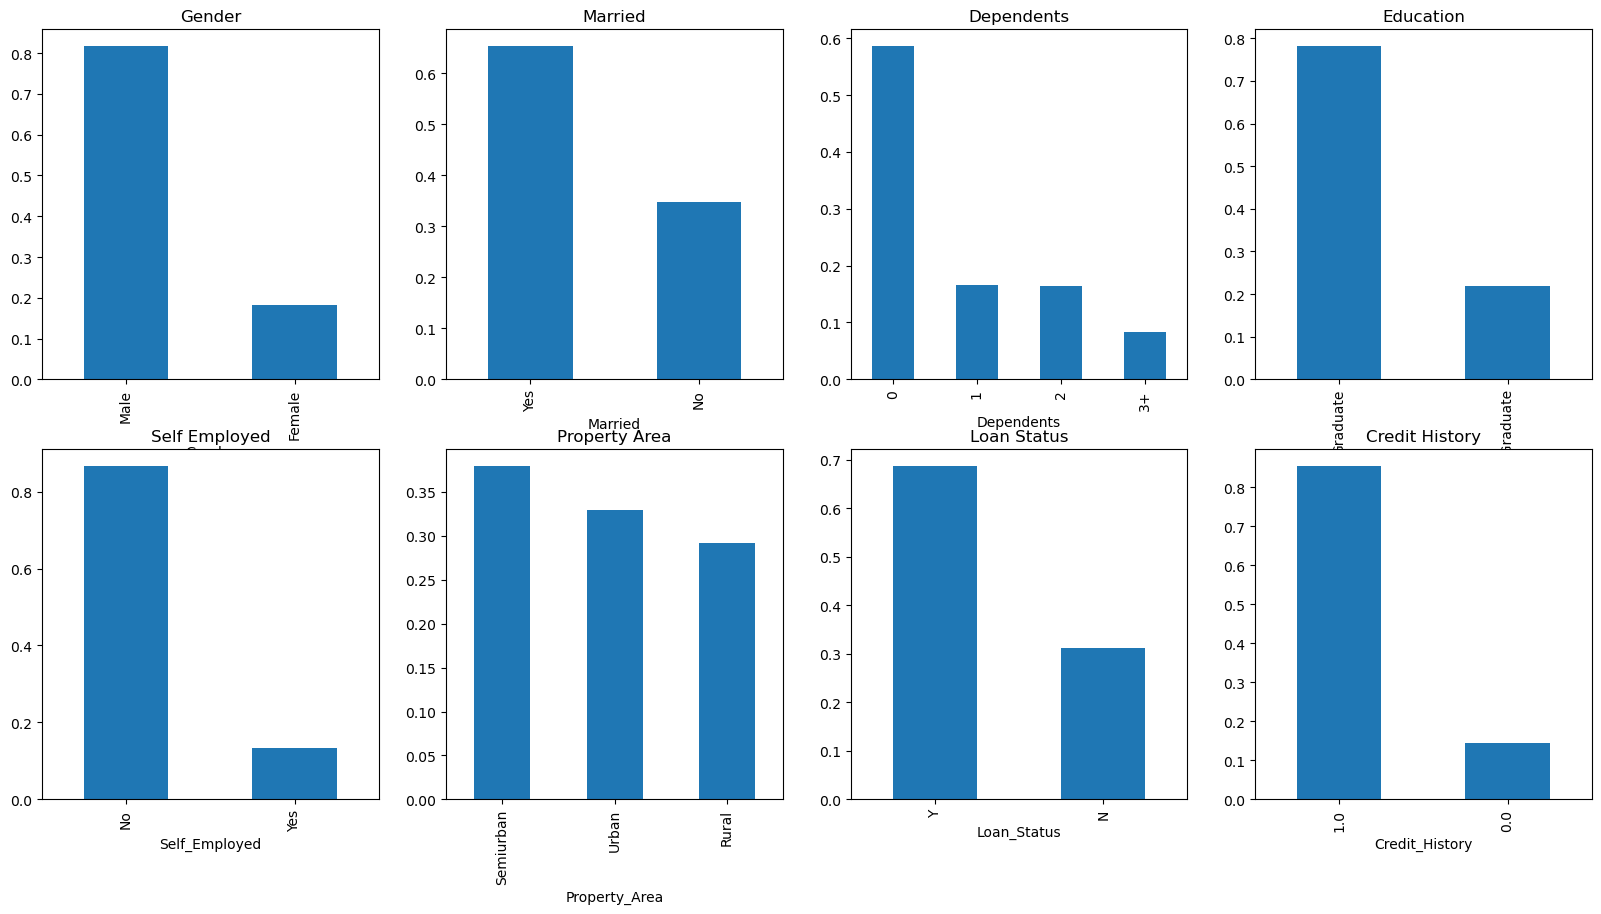

In [410]:
#EDA
plt.figure(1)
plt.subplot(241)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
plt.subplot(242)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(243)
train['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents')
plt.subplot(244)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')
plt.subplot(245)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self Employed')
plt.subplot(246)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Property Area')
plt.subplot(247)
train['Loan_Status'].value_counts(normalize=True).plot.bar(title= 'Loan Status')
plt.subplot(248)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit History')

<Axes: >

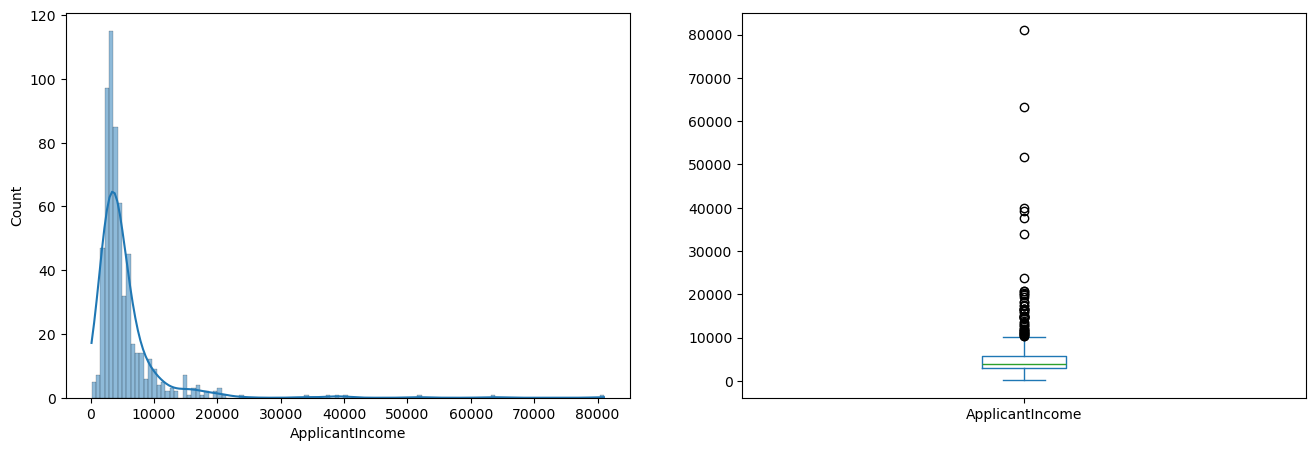

In [411]:
plt.figure(1)
plt.subplot(121)
sns.histplot(train['ApplicantIncome'], kde=True)
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

<Axes: >

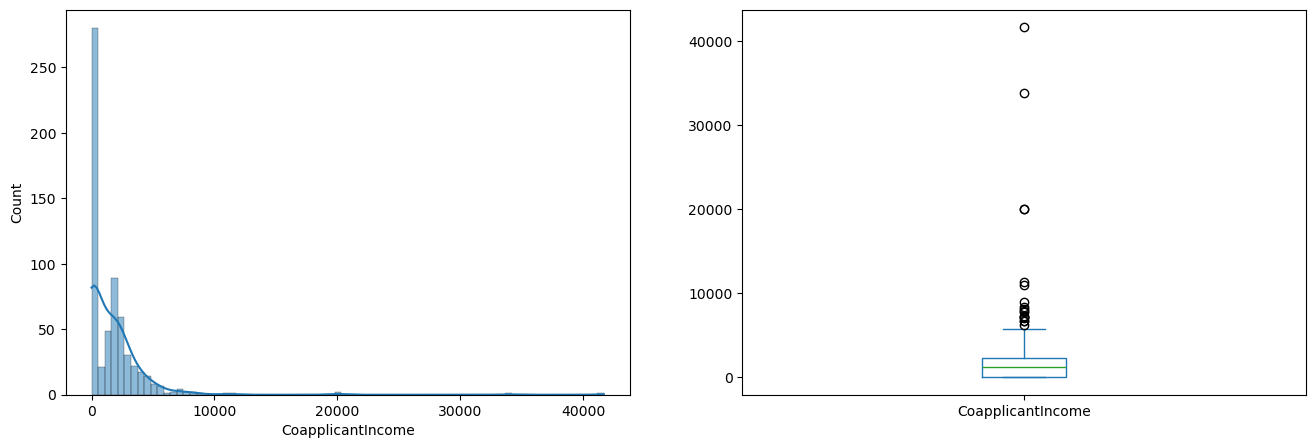

In [412]:
plt.figure(1)
plt.subplot(121)
sns.histplot(train['CoapplicantIncome'], kde=True)
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

<Axes: >

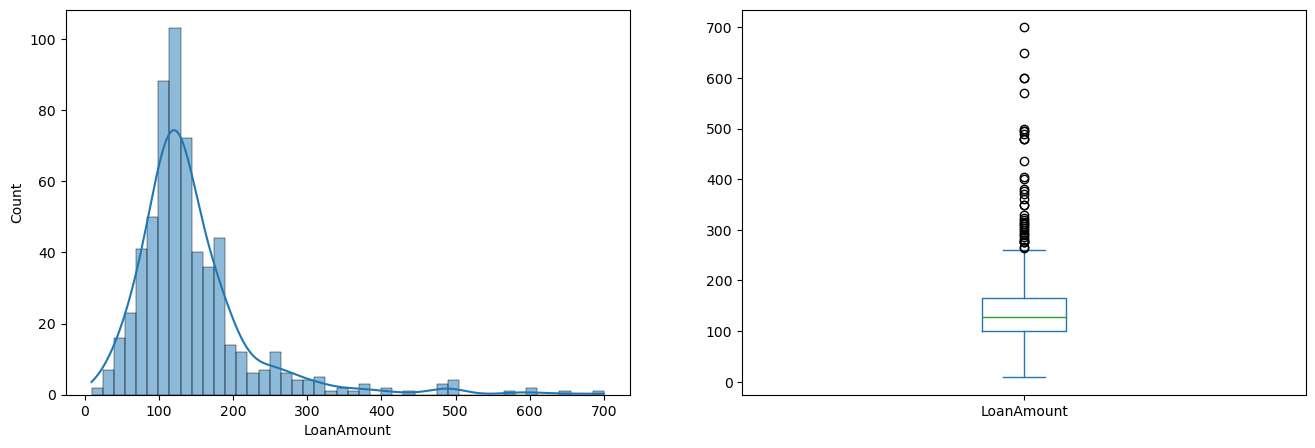

In [413]:
plt.figure(1)
plt.subplot(121)
sns.histplot(train['LoanAmount'], kde=True)
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

<Axes: >

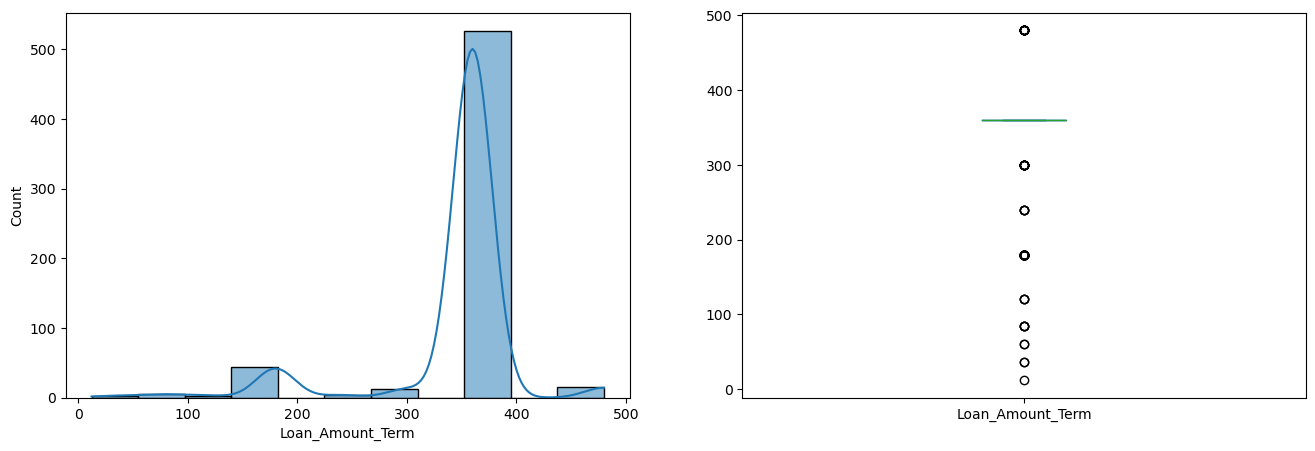

In [414]:
plt.figure(1)
plt.subplot(121)
sns.histplot(train['Loan_Amount_Term'], kde=True)
plt.subplot(122)
train['Loan_Amount_Term'].plot.box(figsize=(16,5))

Text(0.5, 1.0, 'LoanAmountTerm vs LoanAmount')

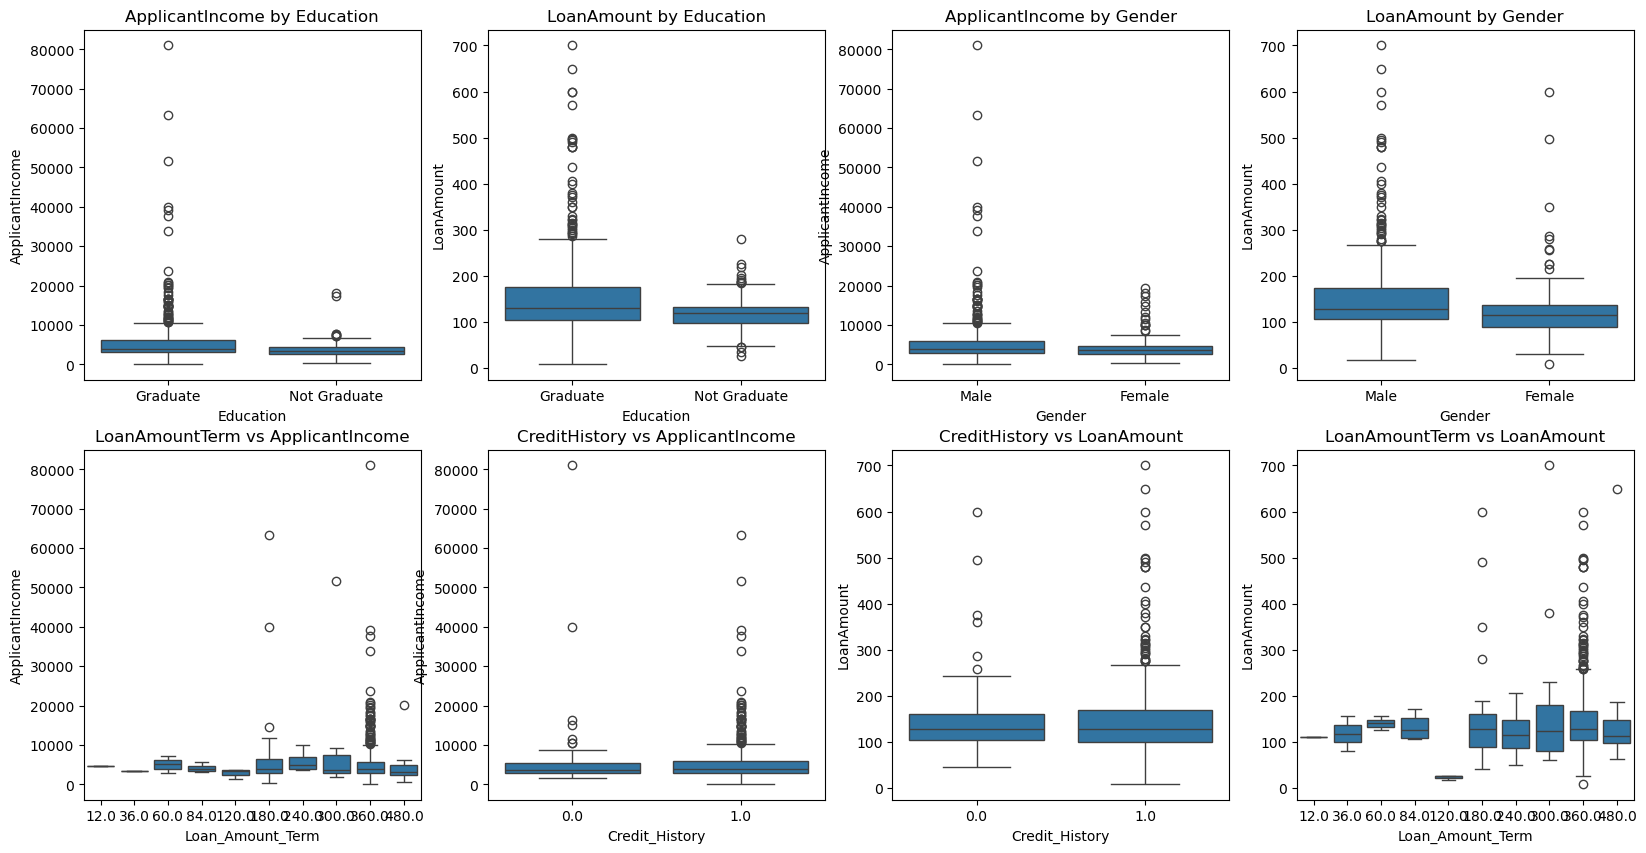

In [415]:
plt.figure(figsize=(20,10)) 
plt.subplot(241)
sns.boxplot(x='Education', y='ApplicantIncome', data=train)
plt.title('ApplicantIncome by Education')
plt.subplot(242)
sns.boxplot(x='Education', y='LoanAmount', data=train)
plt.title('LoanAmount by Education')
plt.subplot(243)
sns.boxplot(x='Gender', y='ApplicantIncome', data=train)
plt.title('ApplicantIncome by Gender')
plt.subplot(244)
sns.boxplot(x='Gender', y='LoanAmount', data=train)
plt.title('LoanAmount by Gender')
plt.subplot(245)
sns.boxplot(x='Loan_Amount_Term', y='ApplicantIncome', data=train)
plt.title('LoanAmountTerm vs ApplicantIncome')
plt.subplot(246)
sns.boxplot(x='Credit_History', y='ApplicantIncome', data=train)
plt.title('CreditHistory vs ApplicantIncome')
plt.subplot(247)
sns.boxplot(x='Credit_History', y='LoanAmount', data=train)
plt.title('CreditHistory vs LoanAmount')
plt.subplot(248)
sns.boxplot(x='Loan_Amount_Term', y='LoanAmount', data=train)
plt.title('LoanAmountTerm vs LoanAmount')

Text(0.5, 1.0, 'LoanAmount by CreditHistory and Education')

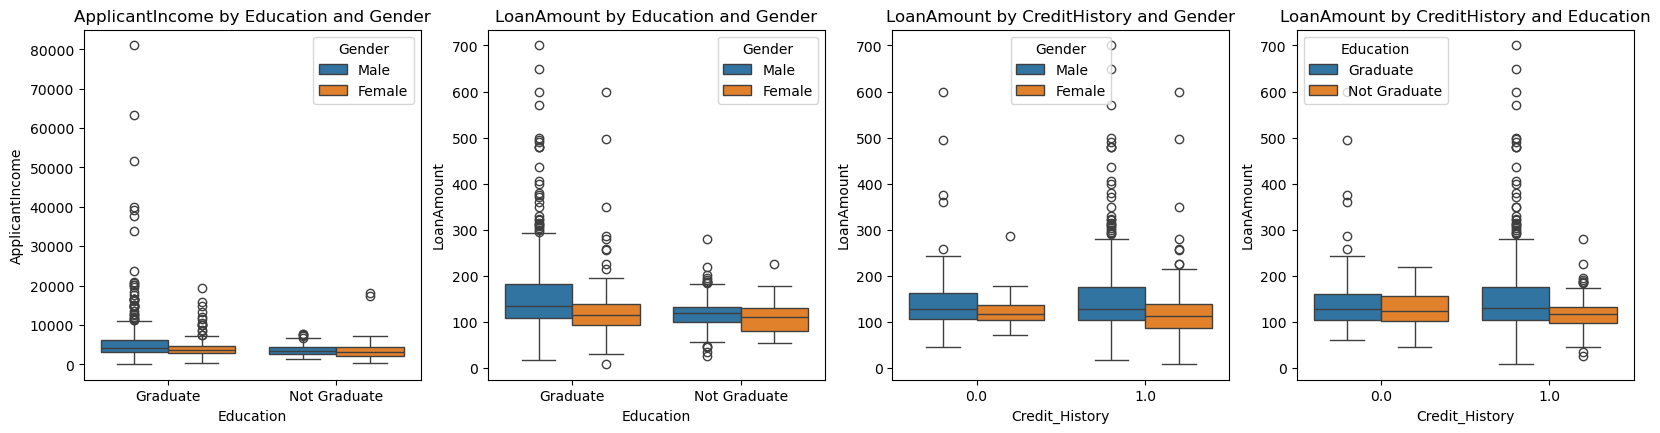

In [416]:
plt.figure(figsize=(20,10)) 
plt.subplot(241)
sns.boxplot(x='Education', y='ApplicantIncome',hue='Gender', data=train)
plt.title('ApplicantIncome by Education and Gender')
plt.subplot(242)
sns.boxplot(x='Education', y='LoanAmount',hue='Gender', data=train)
plt.title('LoanAmount by Education and Gender')
plt.subplot(243)
sns.boxplot(x='Credit_History', y='LoanAmount',hue='Gender', data=train)
plt.title('LoanAmount by CreditHistory and Gender')
plt.subplot(244)
sns.boxplot(x='Credit_History', y='LoanAmount',hue='Education', data=train)
plt.title('LoanAmount by CreditHistory and Education')

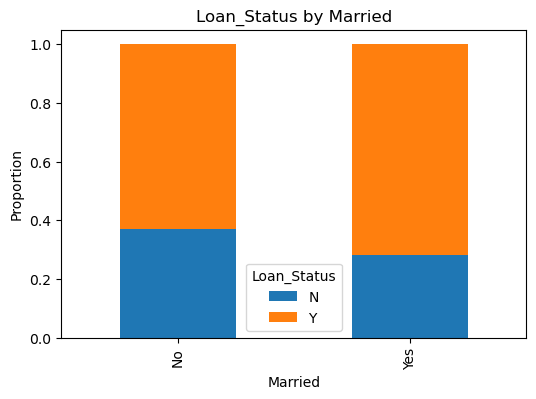

In [417]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married = Married.div(Married.sum(1).astype(float), axis=0)

Married.plot(kind='bar', stacked=True, figsize=(6,4))
plt.title("Loan_Status by Married")
plt.ylabel("Proportion")
plt.show()

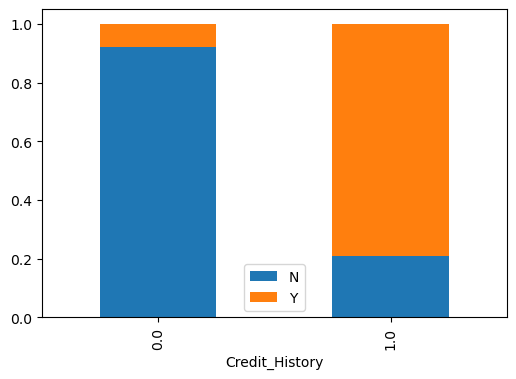

In [418]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

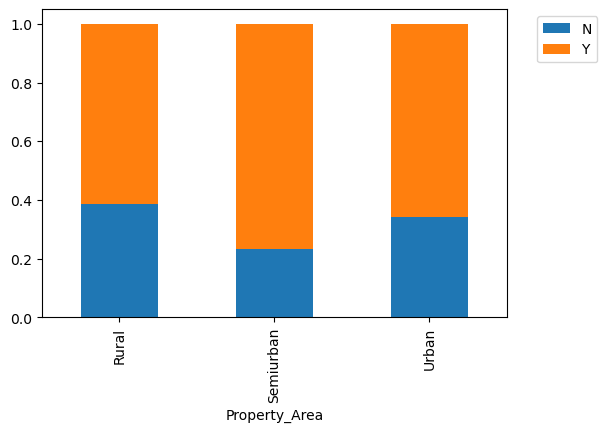

In [419]:
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

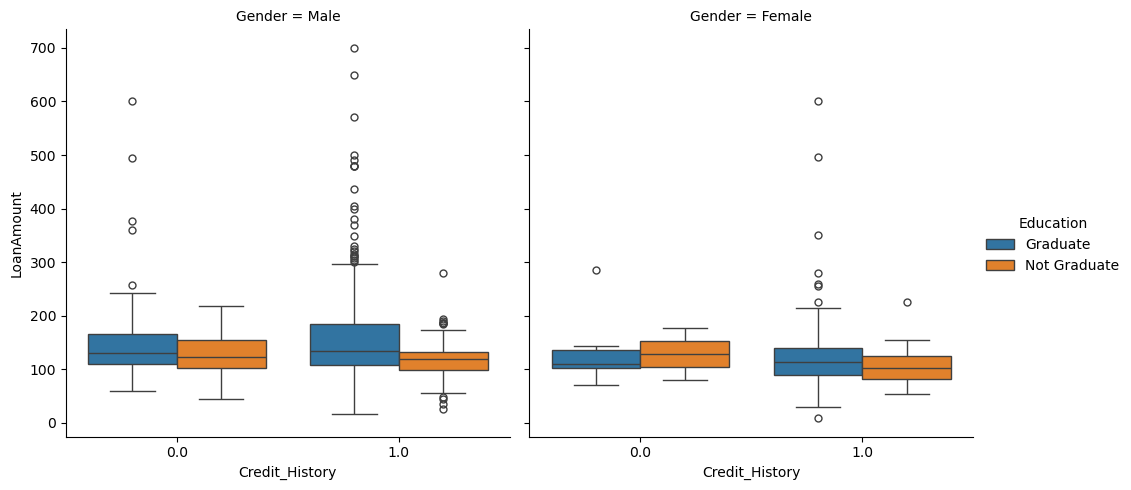

In [420]:
sns.catplot(x='Credit_History',y='LoanAmount', hue='Education', col='Gender', data=train, kind='box',height=5, aspect=1)
plt.show()

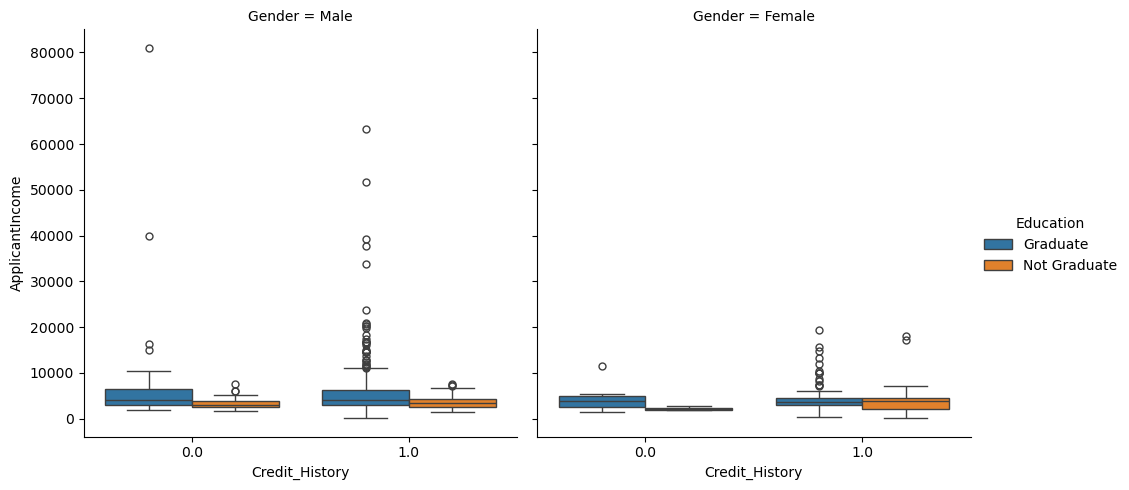

In [421]:
sns.catplot(x='Credit_History',y='ApplicantIncome', hue='Education', col='Gender', data=train, kind='box',height=5, aspect=1)
plt.show()

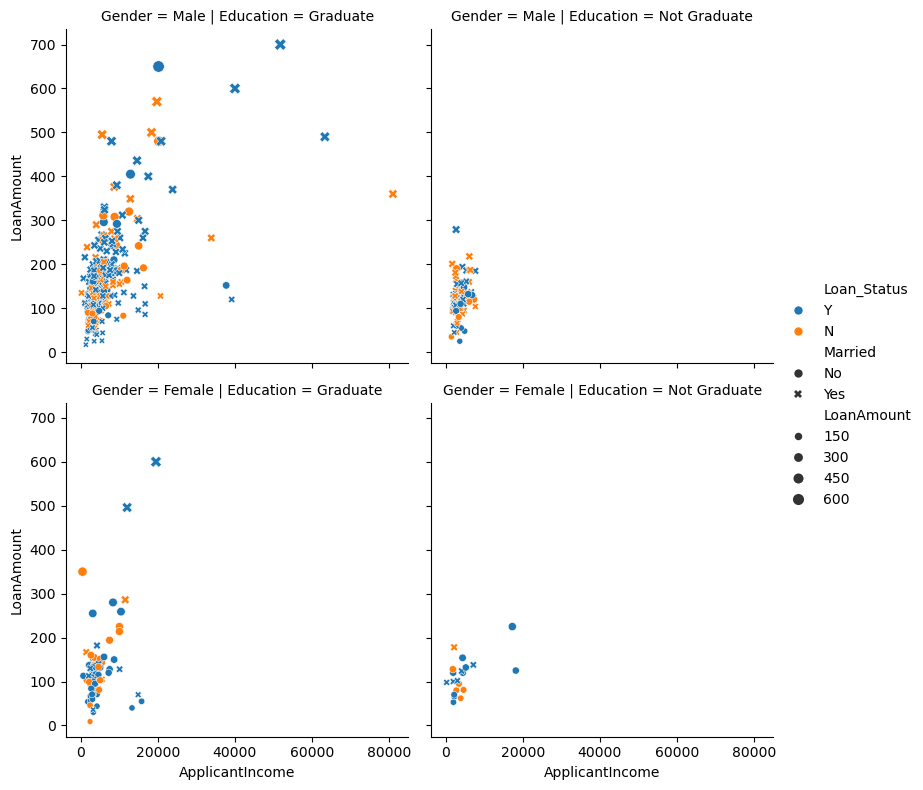

In [422]:
sns.color_palette('pastel')
ax = sns.relplot(data=train, kind='scatter', x='ApplicantIncome',y='LoanAmount',hue='Loan_Status',col='Education', style='Married', size='LoanAmount', row='Gender', height=4)
ax.set(xlabel="ApplicantIncome")
plt.show()

C:\Users\lynnh\AppData\Local\Temp\ipykernel_16828\2637634787.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Loan_Status'] = train['Loan_Status'].replace({'Y':1, 'N':0})


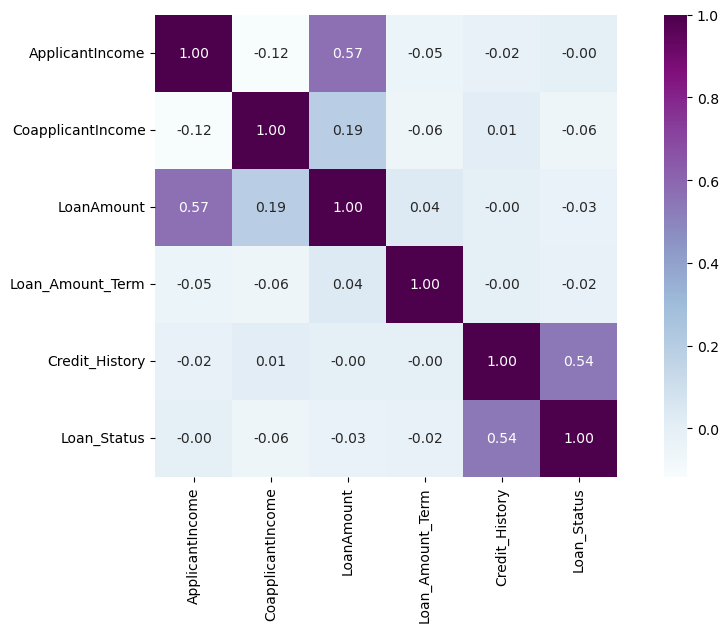

In [423]:
train['Loan_Status'] = train['Loan_Status'].replace({'Y':1, 'N':0})
num_cols = train.select_dtypes(include=['number'])  
plt.figure(figsize=(12,6))
sns.heatmap(num_cols.corr(), annot=True, fmt=".2f", cmap='BuPu', square=True)
plt.show()

In [424]:
#bucketing
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group= ['Low', 'Average', 'High', 'Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels=group)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0,Very High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0,High


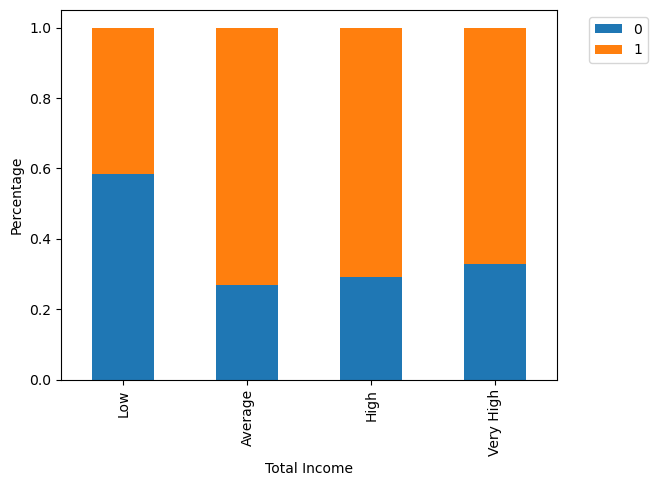

In [425]:
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

In [426]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train['Total_Income'] = scaler.fit_transform(train[['Total_Income']])

In [427]:
#normalization
from sklearn.preprocessing import MinMaxScaler
train['Total_Income'] = MinMaxScaler(feature_range=(0, 1)).fit_transform(train[['Total_Income']])

In [428]:
train=train.drop('Loan_ID',axis=1)

In [429]:
X = train.drop('Loan_Status', axis = 1)
y = train['Loan_Status']

In [430]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
predict = pd.get_dummies(predict)

In [431]:
from sklearn.model_selection import train_test_split

In [432]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [433]:
from sklearn.tree import DecisionTreeClassifier

In [434]:
model = DecisionTreeClassifier(random_state=1)

In [435]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [436]:
predictions = model.predict(X_test)

In [437]:
from sklearn.metrics import accuracy_score, classification_report

In [438]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.41      0.48      0.44        50
           1       0.80      0.75      0.77       135

    accuracy                           0.68       185
   macro avg       0.60      0.61      0.61       185
weighted avg       0.69      0.68      0.68       185



In [439]:
print(accuracy_score(y_test, predictions))

0.6756756756756757


In [440]:
from sklearn.ensemble import RandomForestClassifier

In [441]:
rfmodel = RandomForestClassifier(n_estimators=500)

In [442]:
rfmodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [443]:
rfpredictions = rfmodel.predict(X_test)

In [444]:
print(accuracy_score(y_test, rfpredictions))

0.772972972972973


In [445]:
print(classification_report(y_test, rfpredictions))

              precision    recall  f1-score   support

           0       0.61      0.46      0.52        50
           1       0.82      0.89      0.85       135

    accuracy                           0.77       185
   macro avg       0.71      0.67      0.69       185
weighted avg       0.76      0.77      0.76       185



In [449]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [450]:
from sklearn.linear_model import LogisticRegression
lrmodel = Pipeline([
    ("scaler", StandardScaler()),("clf", LogisticRegression(max_iter=1000, random_state=42))])
lrmodel.fit(X_train, y_train)
pred = lrmodel.predict(X_test)
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.44      0.55        50
           1       0.82      0.94      0.88       135

    accuracy                           0.81       185
   macro avg       0.78      0.69      0.71       185
weighted avg       0.80      0.81      0.79       185

0.8054054054054054


In [451]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = Pipeline([("scaler", StandardScaler()),("clf", KNeighborsClassifier(n_neighbors=5))])
knnmodel.fit(X_train, y_train)
pred = knnmodel.predict(X_test)
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.38      0.16      0.23        50
           1       0.74      0.90      0.82       135

    accuracy                           0.70       185
   macro avg       0.56      0.53      0.52       185
weighted avg       0.65      0.70      0.66       185

0.7027027027027027


In [452]:
from sklearn.ensemble import GradientBoostingClassifier
gbmodel = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05,max_depth=3, random_state=42)
gbmodel.fit(X_train, y_train)
pred = gbmodel.predict(X_test)
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.62      0.48      0.54        50
           1       0.82      0.89      0.85       135

    accuracy                           0.78       185
   macro avg       0.72      0.68      0.70       185
weighted avg       0.77      0.78      0.77       185

0.7783783783783784


In [456]:
from sklearn.svm import SVC
svmodel = Pipeline([("scaler", StandardScaler()),("clf", SVC(kernel="rbf", C=1.0, gamma="scale", probability=True, random_state=42))])
svmodel.fit(X_train, y_train)
pred = svmodel.predict(X_test)
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.46      0.56        50
           1       0.82      0.93      0.88       135

    accuracy                           0.81       185
   macro avg       0.77      0.70      0.72       185
weighted avg       0.80      0.81      0.79       185

0.8054054054054054


In [455]:
from sklearn.neural_network import MLPClassifier
mlpmodel = Pipeline([("scaler", StandardScaler()),("clf", MLPClassifier(hidden_layer_sizes=(128,64),activation="relu", solver="adam",max_iter=500, random_state=42))])
mlpmodel.fit(X_train, y_train)
pred = mlpmodel.predict(X_test)
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.58      0.52      0.55        50
           1       0.83      0.86      0.84       135

    accuracy                           0.77       185
   macro avg       0.70      0.69      0.70       185
weighted avg       0.76      0.77      0.76       185

0.7675675675675676


In [ ]:
#调参

In [461]:
from sklearn.linear_model import LogisticRegression
logit = Pipeline([("scaler", StandardScaler()),("clf", LogisticRegression(max_iter=2000, random_state=42))])
logit_params = {"clf__penalty": ["l1", "l2"],"clf__C": [0.01, 0.1, 1, 10, 100],"clf__solver": ["liblinear"], "clf__class_weight": [None, "balanced"]}
logit_gs = GridSearchCV(logit, logit_params, cv=5, n_jobs=-1, verbose=1, scoring="accuracy")
logit_gs.fit(X_train, y_train)
print("Logistic best:", logit_gs.best_score_, logit_gs.best_params_)
pred = logit_gs.best_estimator_.predict(X_test)
print(classification_report(y_test, pred)); print("ACC:", accuracy_score(y_test, pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Logistic best: 0.8135978112175103 {'clf__C': 0.1, 'clf__class_weight': None, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.76      0.44      0.56        50
           1       0.82      0.95      0.88       135

    accuracy                           0.81       185
   macro avg       0.79      0.69      0.72       185
weighted avg       0.80      0.81      0.79       185

ACC: 0.8108108108108109


In [462]:
from sklearn.neighbors import KNeighborsClassifier
knn = Pipeline([("scaler", StandardScaler()),("clf", KNeighborsClassifier())])
knn_params = {"clf__n_neighbors": [3, 5, 7,  nine:=9, 11], "clf__weights": ["uniform", "distance"],"clf__p": [1, 2]}
knn_gs = GridSearchCV(knn, knn_params, cv=5, n_jobs=-1, verbose=1, scoring="accuracy")
knn_gs.fit(X_train, y_train)
print("KNN best:", knn_gs.best_score_, knn_gs.best_params_)
pred = knn_gs.best_estimator_.predict(X_test)
print(classification_report(y_test, pred)); print("ACC:", accuracy_score(y_test, pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
KNN best: 0.7295759233926129 {'clf__n_neighbors': 11, 'clf__p': 2, 'clf__weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.73      0.16      0.26        50
           1       0.76      0.98      0.85       135

    accuracy                           0.76       185
   macro avg       0.74      0.57      0.56       185
weighted avg       0.75      0.76      0.69       185

ACC: 0.7567567567567568


In [464]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt_params = {"criterion": ["gini", "entropy", "log_loss"],"max_depth": [None, 3, 5, 8, 12, 20],"min_samples_split": [2, 5, 10, 20],"min_samples_leaf": [1, 2, 5, 10]}
dt_gs = GridSearchCV(dt, dt_params, cv=5, n_jobs=-1, verbose=1, scoring="accuracy")
dt_gs.fit(X_train, y_train)
print("DT best:", dt_gs.best_score_, dt_gs.best_params_)
pred = dt_gs.best_estimator_.predict(X_test)
print(classification_report(y_test, pred)); print("ACC:", accuracy_score(y_test, pred))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
DT best: 0.820547195622435 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0       0.57      0.42      0.48        50
           1       0.80      0.88      0.84       135

    accuracy                           0.76       185
   macro avg       0.69      0.65      0.66       185
weighted avg       0.74      0.76      0.74       185

ACC: 0.7567567567567568


In [465]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_params = {"n_estimators": [100, 200, 400],"max_depth": [None, 5, 10, 20],"min_samples_leaf": [1, 2, 5, 10],"min_samples_split": [2, 5, 10],"max_features": ["sqrt", "log2", None],"class_weight": [None, "balanced"]}
rf_gs = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1, verbose=1, scoring="accuracy")
rf_gs.fit(X_train, y_train)
print("RF best:", rf_gs.best_score_, rf_gs.best_params_)
pred = rf_gs.best_estimator_.predict(X_test)
print(classification_report(y_test, pred)); print("ACC:", accuracy_score(y_test, pred))

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
RF best: 0.8229274965800274 {'class_weight': None, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.71      0.44      0.54        50
           1       0.82      0.93      0.87       135

    accuracy                           0.80       185
   macro avg       0.76      0.69      0.71       185
weighted avg       0.79      0.80      0.78       185

ACC: 0.8


In [466]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(random_state=42)
gbm_params = {"n_estimators": [100, 200, 400],"learning_rate": [0.05, 0.1, 0.2],"max_depth": [2, 3, 5],"subsample": [0.7, 0.85, 1.0]}
gbm_gs = GridSearchCV(gbm, gbm_params, cv=5, n_jobs=-1, verbose=1, scoring="accuracy")
gbm_gs.fit(X_train, y_train)
print("GBM best:", gbm_gs.best_score_, gbm_gs.best_params_)
pred = gbm_gs.best_estimator_.predict(X_test)
print(classification_report(y_test, pred)); print("ACC:", accuracy_score(y_test, pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
GBM best: 0.820547195622435 {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.85}
              precision    recall  f1-score   support

           0       0.61      0.44      0.51        50
           1       0.81      0.90      0.85       135

    accuracy                           0.77       185
   macro avg       0.71      0.67      0.68       185
weighted avg       0.76      0.77      0.76       185

ACC: 0.772972972972973


In [468]:
from sklearn.svm import SVC
svm = Pipeline([("scaler", StandardScaler()),("clf", SVC(probability=True, random_state=42))])
svm_params = {"clf__kernel": ["rbf"],"clf__C": [0.1, 1, 10, 50],"clf__gamma": ["scale", "auto", 0.01, 0.001],"clf__class_weight": [None, "balanced"]}
svm_gs = GridSearchCV(svm, svm_params, cv=5, n_jobs=-1, verbose=1, scoring="accuracy")
svm_gs.fit(X_train, y_train)
print("SVM best:", svm_gs.best_score_, svm_gs.best_params_)
pred = svm_gs.best_estimator_.predict(X_test)
print(classification_report(y_test, pred)); print("ACC:", accuracy_score(y_test, pred))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
SVM best: 0.8135704514363885 {'clf__C': 10, 'clf__class_weight': 'balanced', 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.72      0.46      0.56        50
           1       0.82      0.93      0.88       135

    accuracy                           0.81       185
   macro avg       0.77      0.70      0.72       185
weighted avg       0.80      0.81      0.79       185

ACC: 0.8054054054054054


In [467]:
from sklearn.neural_network import MLPClassifier
mlp = Pipeline([("scaler", StandardScaler()),("clf", MLPClassifier(max_iter=600, random_state=42))])
mlp_params = {"clf__hidden_layer_sizes": [(64,), (128,), (128,64), (256,128)],"clf__activation": ["relu", "tanh"],"clf__alpha": [1e-5, 1e-4, 1e-3],"clf__learning_rate_init": [1e-3, 5e-3, 1e-2],"clf__early_stopping": [True]}
mlp_gs = GridSearchCV(mlp, mlp_params, cv=5, n_jobs=-1, verbose=1, scoring="accuracy")
mlp_gs.fit(X_train, y_train)
print("MLP best:", mlp_gs.best_score_, mlp_gs.best_params_)
pred = mlp_gs.best_estimator_.predict(X_test)
print(classification_report(y_test, pred)); print("ACC:", accuracy_score(y_test, pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
MLP best: 0.8066210670314637 {'clf__activation': 'tanh', 'clf__alpha': 1e-05, 'clf__early_stopping': True, 'clf__hidden_layer_sizes': (256, 128), 'clf__learning_rate_init': 0.01}
              precision    recall  f1-score   support

           0       0.72      0.46      0.56        50
           1       0.82      0.93      0.88       135

    accuracy                           0.81       185
   macro avg       0.77      0.70      0.72       185
weighted avg       0.80      0.81      0.79       185

ACC: 0.8054054054054054


In [473]:
rf_best.feature_importances_
imp_df = pd.DataFrame({"Varname": X_train.columns,"Imp": rf_best.feature_importances_})
imp_df.sort_values(by="Imp", ascending=False).head()

,Varname,Imp
4,Credit_History,0.481417
5,Total_Income,0.100018
0,ApplicantIncome,0.073839
2,LoanAmount,0.065330
1,CoapplicantIncome,0.051864


In [471]:
def to_importance_df(importances, feature_names):
    return (pd.DataFrame({'Varname': feature_names, 'Imp': importances}).sort_values('Imp', ascending=False).reset_index(drop=True))

In [472]:
dt_best = dt_gs.best_estimator_         
imp_dt = to_importance_df(dt_best.feature_importances_, X_train.columns)
print(imp_dt.head())

             Varname       Imp
0     Credit_History  0.673192
1         LoanAmount  0.068009
2       Total_Income  0.066390
3  CoapplicantIncome  0.055770
4    ApplicantIncome  0.048822


In [474]:
gbm_best = gbm_gs.best_estimator_
imp_gbm = to_importance_df(gbm_best.feature_importances_, X_train.columns)
print(imp_gbm.head())

             Varname       Imp
0     Credit_History  0.614719
1       Total_Income  0.078942
2    ApplicantIncome  0.077311
3  CoapplicantIncome  0.072020
4         LoanAmount  0.056377


In [476]:
logit_best = logit_gs.best_estimator_
clf = logit_best.named_steps['clf']       
coefs = clf.coef_.ravel()                
imp_logit = to_importance_df(abs(coefs), X_train.columns)
print(imp_logit.head())

                   Varname       Imp
0           Credit_History  1.212512
1        CoapplicantIncome  0.279429
2     Total_Income_bin_Low  0.244376
3  Property_Area_Semiurban  0.231097
4      Property_Area_Rural  0.192647


In [479]:
from sklearn.inspection import permutation_importance
def permutation_imp(model, X, y, feature_names, n_repeats=10):
    r = permutation_importance(model, X, y, n_repeats=n_repeats,
                               random_state=42, n_jobs=-1)
    return to_importance_df(r.importances_mean, feature_names)
# KNN（Pipeline）
knn_best = knn_gs.best_estimator_
imp_knn = permutation_imp(knn_best, X_test, y_test, X_train.columns)
print(imp_knn.head())
# SVM (RBF)（Pipeline）
svm_best = svm_gs.best_estimator_
imp_svm = permutation_imp(svm_best, X_test, y_test, X_train.columns)
print(imp_svm.head())
# MLP（Pipeline）
mlp_best = mlp_gs.best_estimator_
imp_mlp = permutation_imp(mlp_best, X_test, y_test, X_train.columns)
print(imp_mlp.head())

                   Varname       Imp
0           Credit_History  0.035676
1  Property_Area_Semiurban  0.018919
2      Property_Area_Rural  0.018378
3      Property_Area_Urban  0.017297
4         Self_Employed_No  0.012973
                Varname       Imp
0        Credit_History  0.140541
1  Total_Income_bin_Low  0.015135
2       ApplicantIncome  0.000000
3            LoanAmount  0.000000
4     CoapplicantIncome  0.000000
                Varname       Imp
0        Credit_History  0.149189
1            Married_No  0.021622
2  Total_Income_bin_Low  0.018919
3      Loan_Amount_Term  0.014595
4            LoanAmount  0.010811
